Imports.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from eikonal_routines import *

Parameters.

In [11]:
# Number of discretization points
N = 101

# Refraction index (NxN matrix)
F = np.ones((N, N))

# Source points - boundary conditions (Nx3 matrix)
#                 first column    -  x coordinates of the source
#                 second column   -  y coordinates of the source
#                 third column    -  eikonal(x,y)
source = np.array([
    [21, 21, 1],
    [71, 71, 2]
])

# Grid spacing
h = 0.1

# Tolerance used as a stopping criterion
tol = 1e-6

# Large value
infinity = 10 * (N * h) ** 2

Initializations.

In [12]:
# Eikonal initialization
u = np.full((N, N), infinity)

# Adding the sources
for n in range(len(source)):
    u[source[n, 0], source[n, 1]] = source[n, 2]

u_error = 100
n_iter = 0

In [13]:
# FAST SWEEPING ITERATIONS
while u_error > tol:
    u_new = u.copy()

    # Sweep from left to right; from bottom to top
    for j in range(N):
        for i in range(N):
            u_new[i, j] = update_eikonal_2D(i, j, u_new, F, h, N)

    # Sweep from right to left; from bottom to top
    for i in range(N - 1, -1, -1):
        for j in range(N):
            u_new[i, j] = update_eikonal_2D(i, j, u_new, F, h, N)

    # Sweep from right to left; from top to bottom
    for j in range(N - 1, -1, -1):
        for i in range(N - 1, -1, -1):
            u_new[i, j] = update_eikonal_2D(i, j, u_new, F, h, N)

    # Sweep from left to right; from top to bottom
    for i in range(N):
        for j in range(N - 1, -1, -1):
            u_new[i, j] = update_eikonal_2D(i, j, u_new, F, h, N)

    u_error = np.linalg.norm(u - u_new)
    u = u_new
    n_iter += 1

Plots.

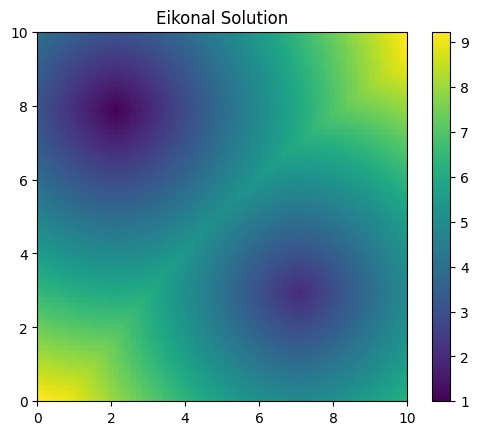

In [14]:
x = np.arange(0, N) * h
y = np.arange(0, N) * h

plt.figure(1)
plt.imshow(u, extent=(x[0], x[-1], y[0], y[-1]))
plt.colorbar()
plt.title('Eikonal Solution')
plt.show()